### Data Exploration & Analysis on Heart Failure Dataset from UCI: https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records#

#### Import Data

In [3]:
HeartFail = read.csv('C:/Users/Mia/OneDrive/Documents/GitHub/Final_Project/Datasets/heart_failure_clinical_records_dataset.csv')

In [4]:
head(HeartFail)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
2,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
3,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
4,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
5,65,1,160,1,20,0,327000,2.7,116,0,0,8,1
6,90,1,47,0,40,1,204000,2.1,132,1,1,8,1


In [5]:
library("dplyr")
library("tidyr")
library("IDPmisc")
library("ggplot2")
library("repr")
library("gmodels")
library("caret")
library("MASS")

### Separating out the continuous variables for stepwise regression

In [33]:
keep <- c('age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'DEATH_EVENT')
IVHeartF <- HeartFail[keep]

In [34]:
head(IVHeartF)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,75,582,20,265000,1.9,130,1
2,55,7861,38,263358,1.1,136,1
3,65,146,20,162000,1.3,129,1
4,50,111,20,210000,1.9,137,1
5,65,160,20,327000,2.7,116,1
6,90,47,40,204000,2.1,132,1


### Create a Model to Look at All 6 Continuous Independent Variables Influence on Predicting Heart Failure:

In [35]:
Model = lm(DEATH_EVENT~., data= IVHeartF)

In [36]:
summary(Model)


Call:
lm(formula = DEATH_EVENT ~ ., data = IVHeartF)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9284 -0.3095 -0.1422  0.3919  0.9967 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               1.416e+00  7.834e-01   1.807   0.0718 .  
age                       9.176e-03  2.068e-03   4.438 1.29e-05 ***
creatinine_phosphokinase  3.867e-05  2.503e-05   1.545   0.1234    
ejection_fraction        -1.022e-02  2.083e-03  -4.908 1.54e-06 ***
platelets                -2.068e-08  2.481e-07  -0.083   0.9336    
serum_creatinine          1.070e-01  2.404e-02   4.450 1.22e-05 ***
serum_sodium             -1.046e-02  5.676e-03  -1.843   0.0663 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4165 on 292 degrees of freedom
Multiple R-squared:  0.2229,	Adjusted R-squared:  0.2069 
F-statistic: 13.96 on 6 and 292 DF,  p-value: 5.817e-14


#### This is confirming the results expressed in the random forest/feature importance as the most influential variables in predicing heart failure are serum creatinine, ejection fraction, and age.

#### Backward Elimination:

In [37]:
step(Model, direction='backward')

Start:  AIC=-516.87
DEATH_EVENT ~ age + creatinine_phosphokinase + ejection_fraction + 
    platelets + serum_creatinine + serum_sodium

                           Df Sum of Sq    RSS     AIC
- platelets                 1    0.0012 50.652 -518.86
<none>                                  50.651 -516.87
- creatinine_phosphokinase  1    0.4142 51.065 -516.44
- serum_sodium              1    0.5894 51.240 -515.41
- age                       1    3.4161 54.067 -499.36
- serum_creatinine          1    3.4348 54.085 -499.25
- ejection_fraction         1    4.1778 54.828 -495.17

Step:  AIC=-518.86
DEATH_EVENT ~ age + creatinine_phosphokinase + ejection_fraction + 
    serum_creatinine + serum_sodium

                           Df Sum of Sq    RSS     AIC
<none>                                  50.652 -518.86
- creatinine_phosphokinase  1    0.4135 51.065 -518.43
- serum_sodium              1    0.5925 51.244 -517.39
- age                       1    3.4303 54.082 -501.27
- serum_creatinine     


Call:
lm(formula = DEATH_EVENT ~ age + creatinine_phosphokinase + ejection_fraction + 
    serum_creatinine + serum_sodium, data = IVHeartF)

Coefficients:
             (Intercept)                       age  creatinine_phosphokinase  
               1.413e+00                 9.184e-03                 3.863e-05  
       ejection_fraction          serum_creatinine              serum_sodium  
              -1.024e-02                 1.070e-01                -1.048e-02  


#### The model dropped platelets

#### Final Model:

In [39]:
fitsome = lm(DEATH_EVENT~age + creatinine_phosphokinase + ejection_fraction + 
    serum_creatinine + serum_sodium, data = IVHeartF)
fitsome


Call:
lm(formula = DEATH_EVENT ~ age + creatinine_phosphokinase + ejection_fraction + 
    serum_creatinine + serum_sodium, data = IVHeartF)

Coefficients:
             (Intercept)                       age  creatinine_phosphokinase  
               1.413e+00                 9.184e-03                 3.863e-05  
       ejection_fraction          serum_creatinine              serum_sodium  
              -1.024e-02                 1.070e-01                -1.048e-02  


#### Forward Selection

In [42]:
Forward = lm(DEATH_EVENT~1, data=IVHeartF)

In [43]:
summary(Forward)


Call:
lm(formula = DEATH_EVENT ~ 1, data = IVHeartF)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3211 -0.3211 -0.3211  0.6789  0.6789 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.32107    0.02705   11.87   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4677 on 298 degrees of freedom


#### <font color=blue> I know this shows significant by the ***, but the intercept at .32, Is it accurate to say that means the model is able to predict a death event about 32% of the time in this dataset?

#### Forward Selection

In [44]:
step(Forward, direction = 'forward', scope = (~age + creatinine_phosphokinase + serum_sodium + serum_creatinine + ejection_fraction + platelets))

Start:  AIC=-453.48
DEATH_EVENT ~ 1

                           Df Sum of Sq    RSS     AIC
+ serum_creatinine          1    5.6443 59.533 -478.56
+ ejection_fraction         1    4.7024 60.475 -473.87
+ age                       1    4.1960 60.981 -471.37
+ serum_sodium              1    2.4835 62.694 -463.09
<none>                                  65.177 -453.48
+ creatinine_phosphokinase  1    0.2565 64.921 -452.66
+ platelets                 1    0.1574 65.020 -452.20

Step:  AIC=-478.56
DEATH_EVENT ~ serum_creatinine

                           Df Sum of Sq    RSS     AIC
+ ejection_fraction         1    4.5872 54.946 -500.54
+ age                       1    2.8622 56.671 -491.29
+ serum_sodium              1    1.3165 58.216 -483.25
<none>                                  59.533 -478.56
+ creatinine_phosphokinase  1    0.2975 59.235 -478.06
+ platelets                 1    0.0895 59.444 -477.01

Step:  AIC=-500.54
DEATH_EVENT ~ serum_creatinine + ejection_fraction

              


Call:
lm(formula = DEATH_EVENT ~ serum_creatinine + ejection_fraction + 
    age + serum_sodium + creatinine_phosphokinase, data = IVHeartF)

Coefficients:
             (Intercept)          serum_creatinine         ejection_fraction  
               1.413e+00                 1.070e-01                -1.024e-02  
                     age              serum_sodium  creatinine_phosphokinase  
               9.184e-03                -1.048e-02                 3.863e-05  


#### Model used all variables except platelets just like backwards elimination

#### Final Model

In [45]:
fitsome2 = lm(DEATH_EVENT~serum_creatinine + ejection_fraction + 
    age + serum_sodium + creatinine_phosphokinase, data = IVHeartF)
fitsome2


Call:
lm(formula = DEATH_EVENT ~ serum_creatinine + ejection_fraction + 
    age + serum_sodium + creatinine_phosphokinase, data = IVHeartF)

Coefficients:
             (Intercept)          serum_creatinine         ejection_fraction  
               1.413e+00                 1.070e-01                -1.024e-02  
                     age              serum_sodium  creatinine_phosphokinase  
               9.184e-03                -1.048e-02                 3.863e-05  


#### Hybrid Stepwise

In [48]:
step(Forward, direction="both", scope=formula(Model))

Start:  AIC=-453.48
DEATH_EVENT ~ 1

                           Df Sum of Sq    RSS     AIC
+ serum_creatinine          1    5.6443 59.533 -478.56
+ ejection_fraction         1    4.7024 60.475 -473.87
+ age                       1    4.1960 60.981 -471.37
+ serum_sodium              1    2.4835 62.694 -463.09
<none>                                  65.177 -453.48
+ creatinine_phosphokinase  1    0.2565 64.921 -452.66
+ platelets                 1    0.1574 65.020 -452.20

Step:  AIC=-478.56
DEATH_EVENT ~ serum_creatinine

                           Df Sum of Sq    RSS     AIC
+ ejection_fraction         1    4.5872 54.946 -500.54
+ age                       1    2.8622 56.671 -491.29
+ serum_sodium              1    1.3165 58.216 -483.25
<none>                                  59.533 -478.56
+ creatinine_phosphokinase  1    0.2975 59.235 -478.06
+ platelets                 1    0.0895 59.444 -477.01
- serum_creatinine          1    5.6443 65.177 -453.48

Step:  AIC=-500.54
DEATH_EVENT


Call:
lm(formula = DEATH_EVENT ~ serum_creatinine + ejection_fraction + 
    age + serum_sodium + creatinine_phosphokinase, data = IVHeartF)

Coefficients:
             (Intercept)          serum_creatinine         ejection_fraction  
               1.413e+00                 1.070e-01                -1.024e-02  
                     age              serum_sodium  creatinine_phosphokinase  
               9.184e-03                -1.048e-02                 3.863e-05  


#### The hybrid model also removed platelets like backward and forward selection.

### The Below Analysis was for initial exploration. I am going to stick to using the above stepwise regression analysis to separate out the continuous variables.

### Below is Stepwise Regression with all variables

### Backward Elimination
#### Get a baseline

In [19]:
FitAll = lm(DEATH_EVENT ~ ., data = HeartFail)


In [20]:
summary(FitAll)


Call:
lm(formula = DEATH_EVENT ~ ., data = HeartFail)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.80866 -0.28041 -0.04205  0.24742  0.96983 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               1.664e+00  6.954e-01   2.392  0.01738 *  
age                       5.767e-03  1.867e-03   3.088  0.00221 ** 
anaemia                  -2.766e-03  4.438e-02  -0.062  0.95035    
creatinine_phosphokinase  3.427e-05  2.247e-05   1.525  0.12840    
diabetes                  1.928e-02  4.410e-02   0.437  0.66236    
ejection_fraction        -9.834e-03  1.844e-03  -5.333 1.96e-07 ***
high_blood_pressure      -1.430e-02  4.565e-02  -0.313  0.75438    
platelets                -8.370e-08  2.208e-07  -0.379  0.70492    
serum_creatinine          8.527e-02  2.123e-02   4.017 7.54e-05 ***
serum_sodium             -7.599e-03  5.024e-03  -1.513  0.13149    
sex                      -6.369e-02  5.108e-02  -1.247  0.21353    
smoking   

#### The above is showing ejection fraction and serum creatinine, the same two independent variables that were most influential in predicting heart failure with the random forest/feature importance are showing up here as well confirming those results. Now what is interesting is that age is slightly significant and anaemia is also showing a significant result which did not prove to be significant in our other analyis. Time can be ignored as we are looking at biometric prediction features.

In [6]:
step(FitAll, direction = 'backward')

Start:  AIC=-590.72
DEATH_EVENT ~ age + anaemia + creatinine_phosphokinase + diabetes + 
    ejection_fraction + high_blood_pressure + platelets + serum_creatinine + 
    serum_sodium + sex + smoking + time

                           Df Sum of Sq    RSS     AIC
- anaemia                   1    0.0005 38.010 -592.72
- smoking                   1    0.0017 38.011 -592.71
- high_blood_pressure       1    0.0130 38.022 -592.62
- platelets                 1    0.0191 38.028 -592.57
- diabetes                  1    0.0254 38.034 -592.52
- sex                       1    0.2066 38.216 -591.10
<none>                                  38.009 -590.72
- serum_sodium              1    0.3041 38.313 -590.34
- creatinine_phosphokinase  1    0.3090 38.318 -590.30
- age                       1    1.2676 39.277 -582.91
- serum_creatinine          1    2.1446 40.154 -576.31
- ejection_fraction         1    3.7801 41.789 -564.37
- time                      1   11.7810 49.790 -512.00

Step:  AIC=-592.72
DE


Call:
lm(formula = DEATH_EVENT ~ age + creatinine_phosphokinase + ejection_fraction + 
    serum_creatinine + serum_sodium + sex + time, data = HeartFail)

Coefficients:
             (Intercept)                       age  creatinine_phosphokinase  
               1.703e+00                 5.692e-03                 3.484e-05  
       ejection_fraction          serum_creatinine              serum_sodium  
              -9.874e-03                 8.526e-02                -8.021e-03  
                     sex                      time  
              -6.558e-02                -2.710e-03  


#### Backwards Elimination shows that the most influential variables are sex, creatinine phosphokinase, serum sodium, age, serum creatinine, ejection fraction, and time. It took out diabetes, smoking, high blood presure, platelets, and anaemia. 

#### Creating a final model

In [22]:
fitsome = lm(DEATH_EVENT ~ sex + creatinine_phosphokinase + serum_sodium + age + serum_creatinine + ejection_fraction + time, data = HeartFail)
fitsome


Call:
lm(formula = DEATH_EVENT ~ sex + creatinine_phosphokinase + serum_sodium + 
    age + serum_creatinine + ejection_fraction + time, data = HeartFail)

Coefficients:
             (Intercept)                       sex  creatinine_phosphokinase  
               1.703e+00                -6.558e-02                 3.484e-05  
            serum_sodium                       age          serum_creatinine  
              -8.021e-03                 5.692e-03                 8.526e-02  
       ejection_fraction                      time  
              -9.874e-03                -2.710e-03  


#### Forward Selection

In [13]:
fitstart = lm(DEATH_EVENT ~ 1, data = HeartFail)
summary(fitstart)


Call:
lm(formula = DEATH_EVENT ~ 1, data = HeartFail)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3211 -0.3211 -0.3211  0.6789  0.6789 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.32107    0.02705   11.87   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4677 on 298 degrees of freedom


In [14]:
step(fitstart, direction = 'forward', scope = (formula(FitAll)))

Start:  AIC=-453.48
DEATH_EVENT ~ 1

                           Df Sum of Sq    RSS     AIC
+ time                      1   18.0991 47.078 -548.74
+ serum_creatinine          1    5.6443 59.533 -478.56
+ ejection_fraction         1    4.7024 60.475 -473.87
+ age                       1    4.1960 60.981 -471.37
+ serum_sodium              1    2.4835 62.694 -463.09
<none>                                  65.177 -453.48
+ high_blood_pressure       1    0.4104 64.767 -453.37
+ anaemia                   1    0.2862 64.891 -452.79
+ creatinine_phosphokinase  1    0.2565 64.921 -452.66
+ platelets                 1    0.1574 65.020 -452.20
+ smoking                   1    0.0104 65.167 -451.52
+ sex                       1    0.0012 65.176 -451.48
+ diabetes                  1    0.0002 65.177 -451.48

Step:  AIC=-548.74
DEATH_EVENT ~ time

                           Df Sum of Sq    RSS     AIC
+ ejection_fraction         1    3.9709 43.107 -573.09
+ serum_creatinine          1    3.0986 43.


Call:
lm(formula = DEATH_EVENT ~ time + ejection_fraction + serum_creatinine + 
    age + serum_sodium + creatinine_phosphokinase + sex, data = HeartFail)

Coefficients:
             (Intercept)                      time         ejection_fraction  
               1.703e+00                -2.710e-03                -9.874e-03  
        serum_creatinine                       age              serum_sodium  
               8.526e-02                 5.692e-03                -8.021e-03  
creatinine_phosphokinase                       sex  
               3.484e-05                -6.558e-02  


#### The results of the forward selection reflect the same results as the backwards elimination as the model removes the less influential variables of diabetes, platelets, high blood pressure, smoking, and anaemia. 

#### Examining the Final Model

In [15]:
fitsome2 = lm(DEATH_EVENT ~ time + ejection_fraction + serum_creatinine + 
    age + serum_sodium + creatinine_phosphokinase + sex, data = HeartFail)
fitsome2


Call:
lm(formula = DEATH_EVENT ~ time + ejection_fraction + serum_creatinine + 
    age + serum_sodium + creatinine_phosphokinase + sex, data = HeartFail)

Coefficients:
             (Intercept)                      time         ejection_fraction  
               1.703e+00                -2.710e-03                -9.874e-03  
        serum_creatinine                       age              serum_sodium  
               8.526e-02                 5.692e-03                -8.021e-03  
creatinine_phosphokinase                       sex  
               3.484e-05                -6.558e-02  


#### I am not getting the expected output here :/

#### Hybrid method

In [16]:
step(fitstart, direction="both", scope=formula(FitAll))

Start:  AIC=-453.48
DEATH_EVENT ~ 1

                           Df Sum of Sq    RSS     AIC
+ time                      1   18.0991 47.078 -548.74
+ serum_creatinine          1    5.6443 59.533 -478.56
+ ejection_fraction         1    4.7024 60.475 -473.87
+ age                       1    4.1960 60.981 -471.37
+ serum_sodium              1    2.4835 62.694 -463.09
<none>                                  65.177 -453.48
+ high_blood_pressure       1    0.4104 64.767 -453.37
+ anaemia                   1    0.2862 64.891 -452.79
+ creatinine_phosphokinase  1    0.2565 64.921 -452.66
+ platelets                 1    0.1574 65.020 -452.20
+ smoking                   1    0.0104 65.167 -451.52
+ sex                       1    0.0012 65.176 -451.48
+ diabetes                  1    0.0002 65.177 -451.48

Step:  AIC=-548.74
DEATH_EVENT ~ time

                           Df Sum of Sq    RSS     AIC
+ ejection_fraction         1    3.9709 43.107 -573.09
+ serum_creatinine          1    3.0986 43.


Call:
lm(formula = DEATH_EVENT ~ time + ejection_fraction + serum_creatinine + 
    age + serum_sodium + creatinine_phosphokinase + sex, data = HeartFail)

Coefficients:
             (Intercept)                      time         ejection_fraction  
               1.703e+00                -2.710e-03                -9.874e-03  
        serum_creatinine                       age              serum_sodium  
               8.526e-02                 5.692e-03                -8.021e-03  
creatinine_phosphokinase                       sex  
               3.484e-05                -6.558e-02  


#### This model also removes the same variables as the backward and foward methods. Therefore for the stepwise regression approach, the most influential variables in predicting heart failure are showing to be age, ejection fraction, serum creatinine, serum sodium, creatinine phosphokinase, and gender.

### The Following is Independent Chi Square for the Categorical Variables:

In [6]:
head(HeartFail)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
2,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
3,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
4,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
5,65,1,160,1,20,0,327000,2.7,116,0,0,8,1
6,90,1,47,0,40,1,204000,2.1,132,1,1,8,1


#### Independent Chi Square: Anaemia:

In [7]:
CrossTable(HeartFail$anaemia, HeartFail$DEATH_EVENT, fisher=TRUE, chisq = TRUE, expected = TRUE, sresid=TRUE, format="SPSS")


   Cell Contents
|-------------------------|
|                   Count |
|         Expected Values |
| Chi-square contribution |
|             Row Percent |
|          Column Percent |
|           Total Percent |
|            Std Residual |
|-------------------------|

Total Observations in Table:  299 

                  | HeartFail$DEATH_EVENT 
HeartFail$anaemia |        0  |        1  | Row Total | 
------------------|-----------|-----------|-----------|
                0 |      120  |       50  |      170  | 
                  |  115.418  |   54.582  |           | 
                  |    0.182  |    0.385  |           | 
                  |   70.588% |   29.412% |   56.856% | 
                  |   59.113% |   52.083% |           | 
                  |   40.134% |   16.722% |           | 
                  |    0.426  |   -0.620  |           | 
------------------|-----------|-----------|-----------|
                1 |       83  |       46  |      129  | 
                  |   87.

#### The p value is 0.2518294 so this shows that anaemia is not significant in predicing heart failure for this dataset.

#### Independent Chi Square: Diabetes

In [9]:
CrossTable(HeartFail$diabetes, HeartFail$DEATH_EVENT, fisher=TRUE, chisq = TRUE, expected = TRUE, sresid=TRUE, format="SPSS")


   Cell Contents
|-------------------------|
|                   Count |
|         Expected Values |
| Chi-square contribution |
|             Row Percent |
|          Column Percent |
|           Total Percent |
|            Std Residual |
|-------------------------|

Total Observations in Table:  299 

                   | HeartFail$DEATH_EVENT 
HeartFail$diabetes |        0  |        1  | Row Total | 
-------------------|-----------|-----------|-----------|
                 0 |      118  |       56  |      174  | 
                   |  118.134  |   55.866  |           | 
                   |    0.000  |    0.000  |           | 
                   |   67.816% |   32.184% |   58.194% | 
                   |   58.128% |   58.333% |           | 
                   |   39.465% |   18.729% |           | 
                   |   -0.012  |    0.018  |           | 
-------------------|-----------|-----------|-----------|
                 1 |       85  |       40  |      125  | 
             

#### The p value is 0.9731996 which is greater than 0.05, therefore diabetes is not showing a significant influence on heart failure in this dataset

#### Independent Chi Square: High Blood Pressure:

In [10]:
CrossTable(HeartFail$high_blood_pressure, HeartFail$DEATH_EVENT, fisher=TRUE, chisq = TRUE, expected = TRUE, sresid=TRUE, format="SPSS")


   Cell Contents
|-------------------------|
|                   Count |
|         Expected Values |
| Chi-square contribution |
|             Row Percent |
|          Column Percent |
|           Total Percent |
|            Std Residual |
|-------------------------|

Total Observations in Table:  299 

                              | HeartFail$DEATH_EVENT 
HeartFail$high_blood_pressure |        0  |        1  | Row Total | 
------------------------------|-----------|-----------|-----------|
                            0 |      137  |       57  |      194  | 
                              |  131.712  |   62.288  |           | 
                              |    0.212  |    0.449  |           | 
                              |   70.619% |   29.381% |   64.883% | 
                              |   67.488% |   59.375% |           | 
                              |   45.819% |   19.064% |           | 
                              |    0.461  |   -0.670  |           | 
------------------

#### The p value is 0.1700298 which is greater than 0.05, therefore high blood pressure is not a significant factor on heart failure in this dataset.

#### Independent Chi Square: Gender

In [11]:
CrossTable(HeartFail$sex, HeartFail$DEATH_EVENT, fisher=TRUE, chisq = TRUE, expected = TRUE, sresid=TRUE, format="SPSS")


   Cell Contents
|-------------------------|
|                   Count |
|         Expected Values |
| Chi-square contribution |
|             Row Percent |
|          Column Percent |
|           Total Percent |
|            Std Residual |
|-------------------------|

Total Observations in Table:  299 

              | HeartFail$DEATH_EVENT 
HeartFail$sex |        0  |        1  | Row Total | 
--------------|-----------|-----------|-----------|
            0 |       71  |       34  |      105  | 
              |   71.288  |   33.712  |           | 
              |    0.001  |    0.002  |           | 
              |   67.619% |   32.381% |   35.117% | 
              |   34.975% |   35.417% |           | 
              |   23.746% |   11.371% |           | 
              |   -0.034  |    0.050  |           | 
--------------|-----------|-----------|-----------|
            1 |      132  |       62  |      194  | 
              |  131.712  |   62.288  |           | 
              |    0

#### The p value is 0.9405034  which is greater than 0.05, therefore gender is not a significant factor in predicting heart failure for this dataset.

#### Independent Chi Square: Smoking

In [12]:
CrossTable(HeartFail$smoking, HeartFail$DEATH_EVENT, fisher=TRUE, chisq = TRUE, expected = TRUE, sresid=TRUE, format="SPSS")


   Cell Contents
|-------------------------|
|                   Count |
|         Expected Values |
| Chi-square contribution |
|             Row Percent |
|          Column Percent |
|           Total Percent |
|            Std Residual |
|-------------------------|

Total Observations in Table:  299 

                  | HeartFail$DEATH_EVENT 
HeartFail$smoking |        0  |        1  | Row Total | 
------------------|-----------|-----------|-----------|
                0 |      137  |       66  |      203  | 
                  |  137.823  |   65.177  |           | 
                  |    0.005  |    0.010  |           | 
                  |   67.488% |   32.512% |   67.893% | 
                  |   67.488% |   68.750% |           | 
                  |   45.819% |   22.074% |           | 
                  |   -0.070  |    0.102  |           | 
------------------|-----------|-----------|-----------|
                1 |       66  |       30  |       96  | 
                  |   65.

#### The p value is 0.8272151 which is greater than 0.05, therefore smoking is not a signficant predictor in heart failure from this dataset. Yet there is plenty of scientific research that shows smoking is not beneficial but actually harmful to a person's health.

#### The results of all the categorical independent variables are not significant which is very exciting because this is confirming the results of the feature importance from our random forest. 

#### Correlation Matrix

In [13]:
install.packages("ggcorrplot")

Installing package into 'C:/Users/Mia/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'ggcorrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Mia\AppData\Local\Temp\RtmpCeXnCg\downloaded_packages


In [14]:
library("ggcorrplot")

In [15]:
####Code source for correlation matrix:http://www.sthda.com/english/wiki/ggcorrplot-visualization-of-a-correlation-matrix-using-ggplot2

Warning message in data(HeartFail):
"data set 'HeartFail' not found"


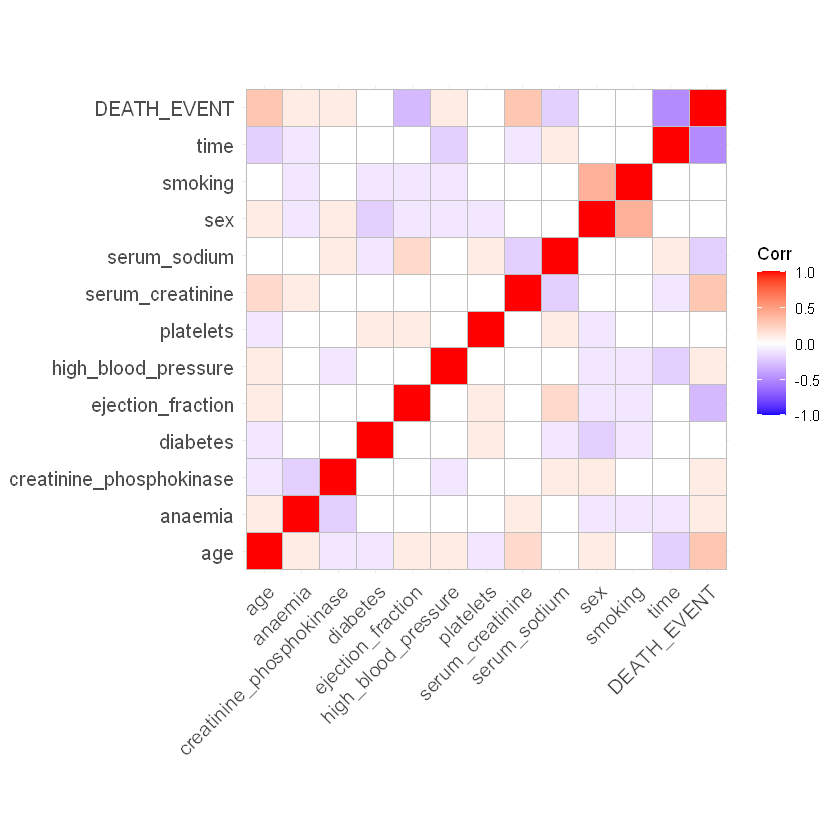

In [16]:
data(HeartFail)
corr <- round(cor(HeartFail), 1)

ggcorrplot(corr)

#### Above is a correlation matrix of the dataset and it shows that the smoking, sex, and diabetes all show a white square in relationship with a death event indicating a nonsignificant factor. As well as the light shade of pale pink for anaemia and high blood pressure. This is just another way to look at the data which also confirms visually the independent chi square analysis on each of the categorical independent variables to have a nonsignificant influence in predicting heart failure.